In [284]:
#Import all of our necessary libraries

import os
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [286]:
with open("Log-batteryusage.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    batteryLevels = [[0]*1000 for _ in range(200)]
    row_count = -1
    for row in data:
        row_count = row_count+1
        for i in range(0,len(row)-2):
            if(row_count < 200):
                batteryLevels[row_count][i] = float(data[row_count+1][i])

batteryFreq = [[0]*10]*199
for row_num in range(0,199):
    for col in range(0,10):
        ind = int(batteryLevels[row_num ][col]/10)
        batteryFreq[row_num ][ind] += 1

In [289]:
batteryFreq = [[0]*10 for _ in range(200)]
for row_num in range(0,199):
    for col in range(0,998):
        ind = int(batteryLevels[row_num][col+1]/10)
        temp = batteryFreq[row_num][ind] + 1
        batteryFreq[row_num][ind] = temp

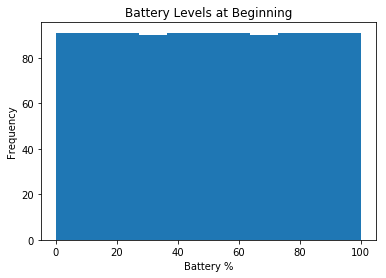

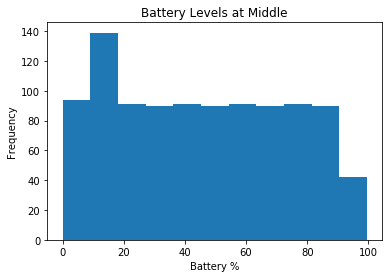

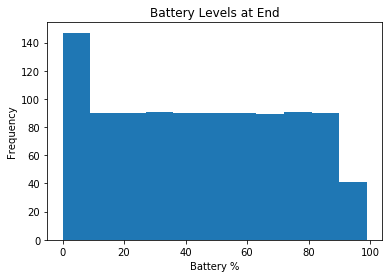

In [290]:
plt.hist(batteryLevels[0][1:], bins='auto')
plt.title("Battery Levels at Beginning")
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[100][1:], bins='auto')
plt.title("Battery Levels at Middle")
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[199][1:], bins='auto')
plt.title("Battery Levels at End")
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()